  # Sentiment Analaysis

In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
sent = SentimentIntensityAnalyzer()

In [4]:
text = input("Enter the review: ")
score =  sent.polarity_scores(text)['compound']

if score >=0.1:
    print("Positive")
elif score <=(-0.1):
    print('Negative')
else:
    print("Neutral")

Enter the review:  hello


Neutral


In [28]:
import pandas as pd

In [31]:
df = pd.read_csv(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Text Processing (NLP)\reviews.csv")
df

,Review
0,Five stars! Exceeded my expectations.
1,Quality is mediocre. Expected more.
2,Completely unsatisfied. Will not buy again.
3,Worst purchase ever. Waste of money.
4,Not worth the money. Poor quality.
...,...
995,Satisfactory performance but could be better.
996,Quality is mediocre. Expected more.
997,Worst purchase ever. Waste of money.
998,Highly disappointed. The item was not as descr...


In [30]:
def feedback(text):
    score =  sent.polarity_scores(text)['compound']
    if score >=0.1:
        return "Positive"
    elif score <=(-0.1):
        return 'Negative'
    else:
        return "Neutral"

In [8]:
df['Result'] = df['Review'].apply(feedback)

In [9]:
df.Result.value_counts()

Result
Positive    446
Negative    306
Neutral     248
Name: count, dtype: int64

<Axes: xlabel='Result'>

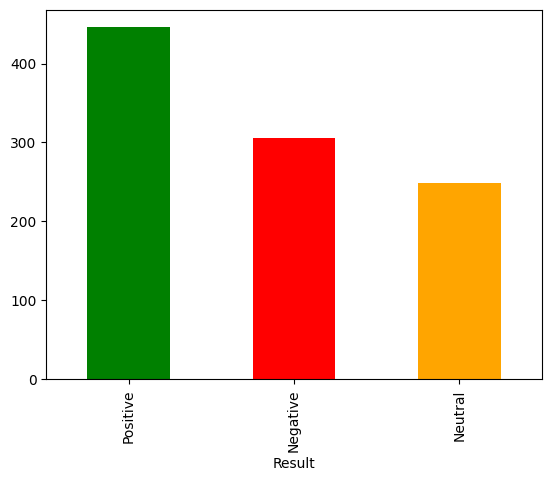

In [10]:
df["Result"].value_counts().plot(kind = 'bar',color = ['green','red','orange'])

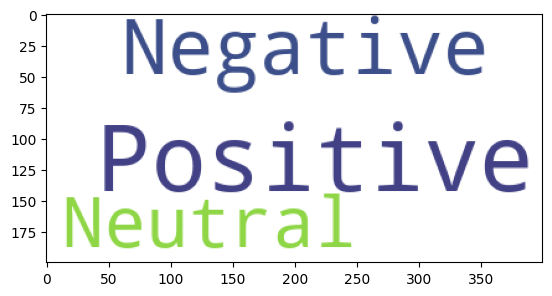

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
x = ' '.join(df['Result'].values)
cloud = WordCloud(background_color='white').generate(x)
plt.imshow(cloud)

# Named Entity Recognition
- Identifying unique words.
- part of speech.

In [12]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import spacy

In [14]:
!python -m spacy download en_core_web_sm

C:\Users\91830\AppData\Local\Programs\Python\Python39\python.exe: No module named spacy


In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
text = "John Doe, a software engineer at Google, moved to San Francisco in January 2020. He graduated from Stanford University with a degree in Computer Science. In his free time, John enjoys hiking in the Sierra Nevada mountains and exploring new restaurants in the Bay Area. Recently, he attended the AI conference in New York, where he met Dr. Jane Smith, a renowned AI researcher from MIT."

In [17]:
entity = nlp(text)

In [18]:
for i in entity.ents:
    print(i.text,i.label_)

John Doe PERSON
Google ORG
San Francisco GPE
January 2020 DATE
Stanford University ORG
Computer Science FAC
John PERSON
Sierra Nevada ORG
the Bay Area LOC
AI ORG
New York GPE
Jane Smith PERSON
AI ORG
MIT ORG


In [19]:
from spacy import displacy

In [20]:
displacy.render(entity)

In [21]:
displacy.render(entity,style='ent')

In [22]:
file = open(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Text Processing (NLP)\ner_text.txt")

In [23]:
text1 = file.read()

In [24]:
text1

"\nApple Inc. is an American multinational technology company headquartered in Cupertino, California. \nIt was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Apple's hardware products include the iPhone, \nthe iPad, the Mac computers, and the Apple Watch. Tim Cook is the current CEO of Apple Inc.\n\nMicrosoft Corporation is another American multinational technology company. Its headquarters are in Redmond, Washington. \nMicrosoft was founded by Bill Gates and Paul Allen in 1975. The company is known for its software products like Windows \noperating system, Microsoft Office suite, and the Internet Explorer and Edge web browsers. Satya Nadella is the current \nCEO of Microsoft.\n\nGoogle LLC is an American multinational technology company that specializes in Internet-related services and products. \nIt was founded by Larry Page and Sergey Brin while they were Ph.D. students at Stanford University. Google's headquarters \nare in Mountain View, California. Sundar Pichai i

In [25]:
nlp = spacy.load("en_core_web_sm")

In [26]:
entity1 = nlp(text)

In [27]:
displacy.render(entity1)